DATOS GENERADOS
Muestras: 500
Features: 20
Clases: [0 1]
Distribución: Clase 0: 246, Clase 1: 254

PARTE 1: CROSS-VALIDATION CON RANDOM FOREST

🌲 UNDERFITTING (muy simple)
----------------------------------------------------------------------
  CV Scores (5 folds): [0.78 0.84 0.75 0.78 0.77]
  Media:  0.7840
  Std:    0.0301
  Rango:  [0.7500, 0.8400]
  Train Score: 0.8160
  Gap (Train - CV): 0.0320
  ✅ Buen balance

🌲 ADECUADO (balanceado)
----------------------------------------------------------------------
  CV Scores (5 folds): [0.88 0.89 0.85 0.91 0.89]
  Media:  0.8840
  Std:    0.0196
  Rango:  [0.8500, 0.9100]
  Train Score: 1.0000
  Gap (Train - CV): 0.1160
  ✅ Buen balance

🌲 OVERFITTING (muy complejo)
----------------------------------------------------------------------
  CV Scores (5 folds): [0.86 0.91 0.86 0.89 0.88]
  Media:  0.8800
  Std:    0.0190
  Rango:  [0.8600, 0.9100]
  Train Score: 1.0000
  Gap (Train - CV): 0.1200
  ✅ Buen balance

PARTE 2: CROSS-VALIDATION CO

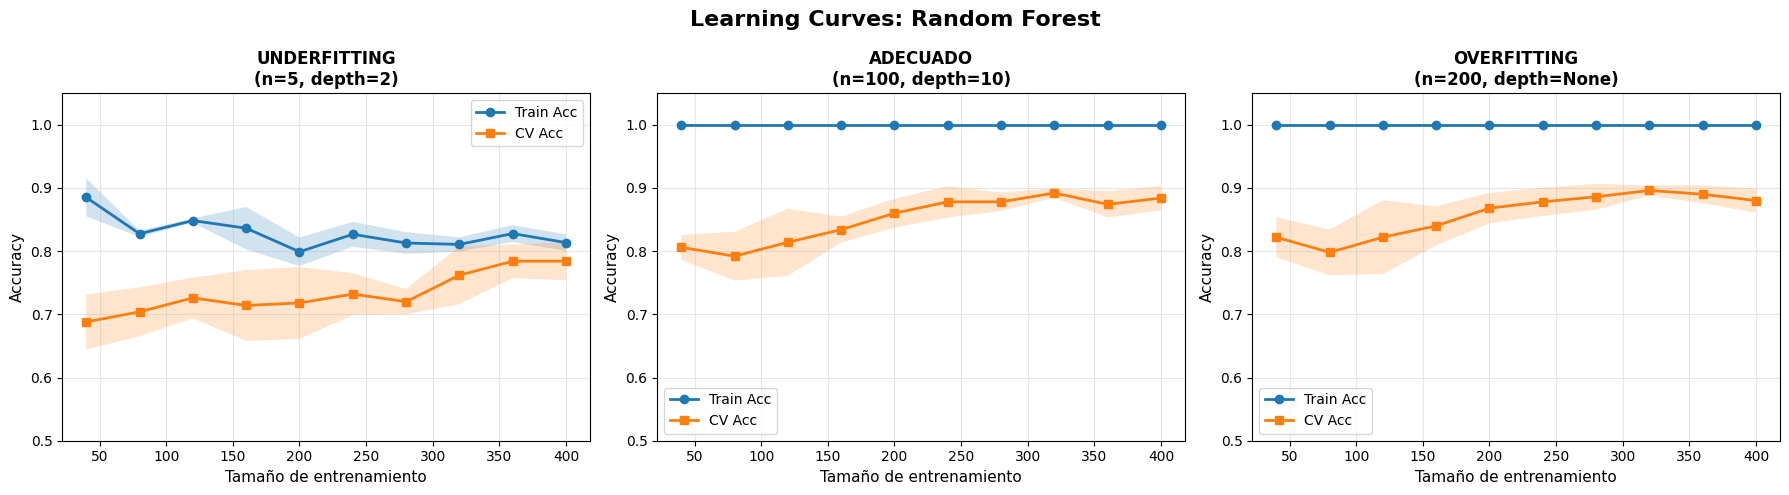


PARTE 4: EFECTO DE n_estimators (número de árboles)
n_estimators=  5 → Train: 0.9740, CV: 0.7860
n_estimators= 10 → Train: 0.9880, CV: 0.8120
n_estimators= 25 → Train: 1.0000, CV: 0.8620
n_estimators= 50 → Train: 1.0000, CV: 0.8760
n_estimators=100 → Train: 1.0000, CV: 0.8840
n_estimators=200 → Train: 1.0000, CV: 0.8780
n_estimators=300 → Train: 1.0000, CV: 0.8920


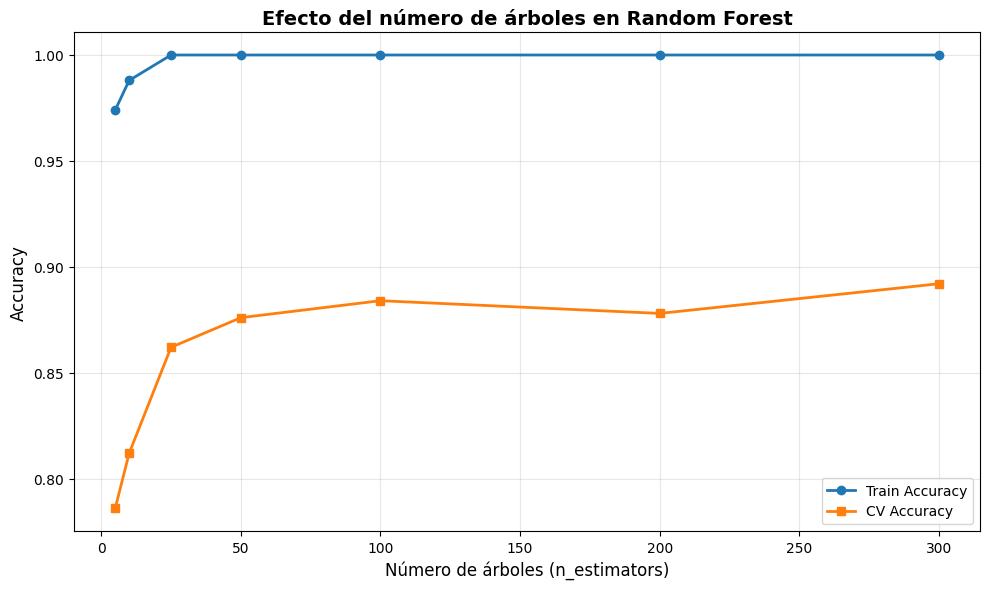


RESUMEN: PARÁMETROS CLAVE DE RANDOM FOREST

🌲 n_estimators (número de árboles):
   • Más árboles = más estabilidad y mejor rendimiento
   • Pero después de ~100-200, mejora marginal
   • Raramente causa overfitting por sí solo

🌳 max_depth (profundidad máxima):
   • Bajo (2-5):     UNDERFITTING → árboles muy simples
   • Medio (10-20):  ADECUADO → captura patrones complejos
   • Alto (None):    OVERFITTING → memoriza ruido

📊 min_samples_split / min_samples_leaf:
   • Valores altos: previenen overfitting (regularización)
   • Valores bajos: permiten splits muy específicos

✅ Random Forest es naturalmente resistente al overfitting
   gracias al ensemble (promedio de muchos árboles)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report

# ============================================
# GENERAR DATOS DE EJEMPLO
# ============================================
np.random.seed(42)
X, y = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

print("=" * 70)
print("DATOS GENERADOS")
print("=" * 70)
print(f"Muestras: {X.shape[0]}")
print(f"Features: {X.shape[1]}")
print(f"Clases: {np.unique(y)}")
print(f"Distribución: Clase 0: {(y==0).sum()}, Clase 1: {(y==1).sum()}")

# ============================================
# PARTE 1: CROSS-VALIDATION BÁSICA
# ============================================
print("\n" + "=" * 70)
print("PARTE 1: CROSS-VALIDATION CON RANDOM FOREST")
print("=" * 70)

# Crear 3 modelos con diferentes configuraciones
models = {
    'UNDERFITTING (muy simple)': RandomForestClassifier(
        n_estimators=5,      # Pocos árboles
        max_depth=2,         # Muy poco profundos
        random_state=42
    ),
    'ADECUADO (balanceado)': RandomForestClassifier(
        n_estimators=100,    # Suficientes árboles
        max_depth=10,        # Profundidad moderada
        random_state=42
    ),
    'OVERFITTING (muy complejo)': RandomForestClassifier(
        n_estimators=200,    # Muchos árboles
        max_depth=None,      # Sin límite de profundidad
        min_samples_split=2, # Permite splits muy específicos
        random_state=42
    )
}

# Evaluar cada modelo con CV
for name, model in models.items():
    print(f"\n🌲 {name}")
    print("-" * 70)
    
    # Cross-validation con 5 folds
    cv_scores = cross_val_score(
        model, X, y,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    print(f"  CV Scores (5 folds): {cv_scores}")
    print(f"  Media:  {cv_scores.mean():.4f}")
    print(f"  Std:    {cv_scores.std():.4f}")
    print(f"  Rango:  [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")
    
    # Entrenar en todo el dataset para comparar
    model.fit(X, y)
    train_score = model.score(X, y)
    print(f"  Train Score: {train_score:.4f}")
    print(f"  Gap (Train - CV): {train_score - cv_scores.mean():.4f}")
    
    # Interpretación
    gap = train_score - cv_scores.mean()
    if gap > 0.15:
        print(f"  ⚠️  OVERFITTING detectado (gap > 0.15)")
    elif cv_scores.mean() < 0.75:
        print(f"  ⚠️  UNDERFITTING detectado (CV < 0.75)")
    else:
        print(f"  ✅ Buen balance")

# ============================================
# PARTE 2: CROSS-VALIDATION CON MÚLTIPLES MÉTRICAS
# ============================================
print("\n" + "=" * 70)
print("PARTE 2: CROSS-VALIDATION CON MÚLTIPLES MÉTRICAS")
print("=" * 70)

model_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# Evaluar múltiples métricas a la vez
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv_results = cross_validate(
    model_balanced, X, y,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

print("\nResultados de Cross-Validation (5 folds):")
print("-" * 70)
for metric in ['accuracy', 'precision', 'recall', 'f1']:
    test_scores = cv_results[f'test_{metric}']
    train_scores = cv_results[f'train_{metric}']
    
    print(f"\n📊 {metric.upper()}:")
    print(f"  Train: {train_scores.mean():.4f} (±{train_scores.std():.4f})")
    print(f"  Test:  {test_scores.mean():.4f} (±{test_scores.std():.4f})")
    print(f"  Gap:   {train_scores.mean() - test_scores.mean():.4f}")

# ============================================
# PARTE 3: LEARNING CURVES
# ============================================
print("\n" + "=" * 70)
print("PARTE 3: LEARNING CURVES")
print("=" * 70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Learning Curves: Random Forest', fontsize=16, fontweight='bold')

configs = [
    {
        'model': RandomForestClassifier(n_estimators=5, max_depth=2, random_state=42),
        'label': 'UNDERFITTING\n(n=5, depth=2)',
        'ax': axes[0]
    },
    {
        'model': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
        'label': 'ADECUADO\n(n=100, depth=10)',
        'ax': axes[1]
    },
    {
        'model': RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42),
        'label': 'OVERFITTING\n(n=200, depth=None)',
        'ax': axes[2]
    }
]

for config in configs:
    print(f"\nCalculando learning curve: {config['label']}...")
    
    train_sizes, train_scores, val_scores = learning_curve(
        config['model'], X, y,
        cv=5,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    ax = config['ax']
    ax.plot(train_sizes, train_mean, 'o-', label='Train Acc', linewidth=2)
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    
    ax.plot(train_sizes, val_mean, 's-', label='CV Acc', linewidth=2)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    
    ax.set_xlabel('Tamaño de entrenamiento', fontsize=11)
    ax.set_ylabel('Accuracy', fontsize=11)
    ax.set_title(config['label'], fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.5, 1.05])
    
    gap = train_mean[-1] - val_mean[-1]
    print(f"  Train final: {train_mean[-1]:.3f}")
    print(f"  CV final:    {val_mean[-1]:.3f}")
    print(f"  Gap:         {gap:.3f}")

plt.tight_layout()
plt.show()

# ============================================
# PARTE 4: COMPARACIÓN DE HIPERPARÁMETROS
# ============================================
print("\n" + "=" * 70)
print("PARTE 4: EFECTO DE n_estimators (número de árboles)")
print("=" * 70)

n_estimators_values = [5, 10, 25, 50, 100, 200, 300]
cv_scores_list = []
train_scores_list = []

for n_est in n_estimators_values:
    model = RandomForestClassifier(
        n_estimators=n_est,
        max_depth=10,
        random_state=42
    )
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    cv_scores_list.append(cv_scores.mean())
    
    # Train score
    model.fit(X, y)
    train_scores_list.append(model.score(X, y))
    
    print(f"n_estimators={n_est:3d} → Train: {train_scores_list[-1]:.4f}, CV: {cv_scores_list[-1]:.4f}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores_list, 'o-', label='Train Accuracy', linewidth=2)
plt.plot(n_estimators_values, cv_scores_list, 's-', label='CV Accuracy', linewidth=2)
plt.xlabel('Número de árboles (n_estimators)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Efecto del número de árboles en Random Forest', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("RESUMEN: PARÁMETROS CLAVE DE RANDOM FOREST")
print("=" * 70)
print("""
🌲 n_estimators (número de árboles):
   • Más árboles = más estabilidad y mejor rendimiento
   • Pero después de ~100-200, mejora marginal
   • Raramente causa overfitting por sí solo

🌳 max_depth (profundidad máxima):
   • Bajo (2-5):     UNDERFITTING → árboles muy simples
   • Medio (10-20):  ADECUADO → captura patrones complejos
   • Alto (None):    OVERFITTING → memoriza ruido

📊 min_samples_split / min_samples_leaf:
   • Valores altos: previenen overfitting (regularización)
   • Valores bajos: permiten splits muy específicos

✅ Random Forest es naturalmente resistente al overfitting
   gracias al ensemble (promedio de muchos árboles)
""")